# Task : 1

=========================================================================================================================

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

### What will be predicted score if a student study for 9.25 hrs in a day ?

=========================================================================================================================

Library required to read the DataFrame

In [1]:
import pandas as pd

### Data Preparation

Reading data from given link

In [2]:
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Get the metadata of columns

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Get the count for each column

In [4]:
Data.count()

Hours     25
Scores    25
dtype: int64

## Data Visualization

Libraries used to plot the graph

In [5]:
import matplotlib.pyplot as mplb
%matplotlib inline
import seaborn as sns

Plotting the distribution of scores

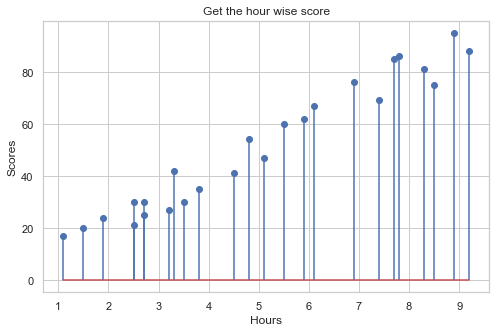

In [6]:
sns.set(style="whitegrid")
mplb.figure(figsize=(8,5))
mplb.stem(Data.Hours, Data.Scores, use_line_collection=True )
mplb.ylabel("Scores")
mplb.xlabel("Hours")
mplb.title("Get the hour wise score")
mplb.show()

Reshape your data

In [7]:
X=Data['Hours'].values.reshape(-1, 1)
Y=Data['Scores'].values.reshape(-1, 1)

## Training the Algorithm

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 

Library used as evaluation tool

In [9]:
from sklearn import metrics

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression  

Linear = LinearRegression()  
Linear.fit(X_train, Y_train)

Linear_Y_pred = Linear.predict(X_test)

In [11]:
Linear_Accuracy = Linear.score(X_test,Y_test)
Linear_MAE = metrics.mean_absolute_error(Y_test, Linear_Y_pred)
Linear_MSE = metrics.mean_squared_error(Y_test, Linear_Y_pred)

In [12]:
print('LinearRegression Accuracy : ', Linear_Accuracy)
print('LinearRegression Mean Absolute Error : ',Linear_MAE)
print('LinearRegression Mean Squared Error : ',Linear_MSE)

LinearRegression Accuracy :  0.9454906892105356
LinearRegression Mean Absolute Error :  4.183859899002975
LinearRegression Mean Squared Error :  21.5987693072174


### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso

Lasso = Lasso()  
Lasso.fit(X_train, Y_train)

Lasso_Y_pred = Lasso.predict(X_test)

In [14]:
Lasso_Accuracy = Lasso.score(X_test,Y_test)
Lasso_MAE = metrics.mean_absolute_error(Y_test, Lasso_Y_pred)
Lasso_MSE = metrics.mean_squared_error(Y_test, Lasso_Y_pred)

In [15]:
print('LassoRegression Accuracy : ', Lasso_Accuracy)
print('LassoRegression Mean Absolute Error : ',Lasso_MAE)
print('LassoRegression Mean Squared Error : ',Lasso_MSE)

LassoRegression Accuracy :  0.9482597940686199
LassoRegression Mean Absolute Error :  3.9915771073417075
LassoRegression Mean Squared Error :  20.50153919825004


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge  

Ridge = Ridge()  
Ridge.fit(X_train, Y_train)

Ridge_Y_pred = Ridge.predict(X_test)

In [17]:
Ridge_Accuracy = Ridge.score(X_test,Y_test)
Ridge_MAE = metrics.mean_absolute_error(Y_test, Ridge_Y_pred)
Ridge_MSE = metrics.mean_squared_error(Y_test, Ridge_Y_pred)

In [18]:
print('RidgeRegression Accuracy : ', Ridge_Accuracy)
print('RidgeRegression Mean Absolute Error : ',Ridge_MAE)
print('RidgeRegression Mean Squared Error : ',Ridge_MSE)

RidgeRegression Accuracy :  0.9469535028586777
RidgeRegression Mean Absolute Error :  4.089342367221116
RidgeRegression Mean Squared Error :  21.01914402727752


### ElasticNet Regression

In [19]:
from sklearn.linear_model import ElasticNet

ElasticNetReg = ElasticNet()  
ElasticNetReg.fit(X_train, Y_train)

ElasticNet_Y_pred = ElasticNetReg.predict(X_test)

In [20]:
ElasticNet_Accuracy = ElasticNetReg.score(X_test,Y_test)
ElasticNet_MAE = metrics.mean_absolute_error(Y_test, ElasticNet_Y_pred)
ElasticNet_MSE = metrics.mean_squared_error(Y_test, ElasticNet_Y_pred)

In [21]:
print('ElasticNetRegression Accuracy : ', ElasticNet_Accuracy)
print('ElasticNetRegression Mean Absolute Error : ',ElasticNet_MAE)
print('ElasticNetRegression Mean Squared Error : ',ElasticNet_MSE)

ElasticNetRegression Accuracy :  0.9511594561898395
ElasticNetRegression Mean Absolute Error :  3.2134283660757093
ElasticNetRegression Mean Squared Error :  19.35257707933797


In [22]:
models = pd.DataFrame({'Model' : ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression'],
                   'Accuracy Score' : [Linear_Accuracy, Lasso_Accuracy, Ridge_Accuracy, ElasticNet_Accuracy]})

models.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score
3,ElasticNet Regression,0.951159
1,Lasso Regression,0.948260
2,Ridge Regression,0.946954
0,Linear Regression,0.945491


We see the ElasticNet Regression model has the higgest Accuracy score. Hence we going to use this model.

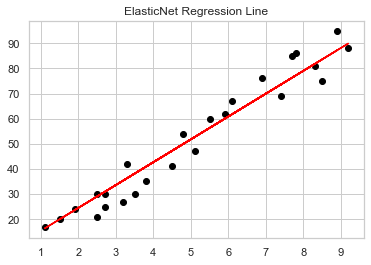

In [23]:
mplb.scatter(X, Y,color='black')
mplb.plot(X, ElasticNetReg.coef_*X+ElasticNetReg.intercept_, color='red')
mplb.title('ElasticNet Regression Line')
mplb.show()

## Making Predictions

In [24]:
df = pd.DataFrame()
df['Actual Scores'] = Y_test[:,0]
df['Predicted Scores'] = ElasticNet_Y_pred
df

,Actual Scores,Predicted Scores
0,20,19.939207
1,27,35.398658
2,69,73.592597
3,30,29.033002
4,62,59.951905


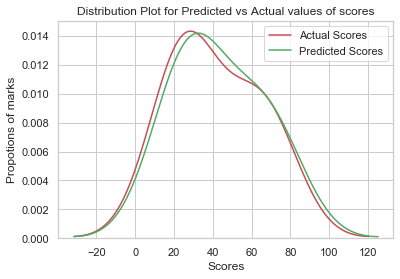

In [25]:
ax1 = sns.distplot(Y_test,hist = False, color = 'r', label = 'Actual Scores')
sns.distplot(ElasticNet_Y_pred,hist = False, color = 'g', label = 'Predicted Scores')
mplb.title('Distribution Plot for Predicted vs Actual values of scores')
mplb.ylabel('Propotions of marks')
mplb.xlabel('Scores')
mplb.show()

What will be predicted score if a student study for 9.25 hrs in a day ?

In [26]:
import numpy as np
hours = 9.25
own_pred = ElasticNetReg.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 90.41611763296599
